In [1]:
from drivers.keysight81150a import Keysight81150a
from drivers.keysightdsox3024a import Dsox3024a
from measurement_waveforms.discrete_waveform import HysteresisLoop, PUNDPulse
from pyvisa import ResourceManager
from analysis.hysteresis import process_raw_hyst

In [2]:
rm = ResourceManager()
rm.list_resources()

()

In [3]:
awg = Keysight81150a('VIRTUAL')
scope = Dsox3024a('VIRTUAL')
print(awg.idn())
print(scope.idn())

INITIALIZING VIRTUAL RESOURCE MANAGER, VISA NOT CONNECTED
INITIALIZING VIRTUAL RESOURCE MANAGER, VISA NOT CONNECTED
VirtualInstrument,Model1234,Serial123456,1.0
VirtualInstrument,Model1234,Serial123456,1.0


In [4]:
experiment = HysteresisLoop(awg, scope, amplitude=3.0, frequency=1.0e6, v_div=0.02, n_cycles=2)
experiment.run_experiment(save_path=r"C:\Users\adqua\OneDrive\Documents\Lab\virtual_hyst_data.csv")

Estimated Peak-to-Peak Ratio of targetted value is 100.0%
QUERY:  :DATA:CAT?  NOT IN virtual_scpi_queries.json
Capturing waveform of type HYSTERESIS for 1e-06 seconds...
Waveform captured.
Waveform data saved to C:\Users\adqua\OneDrive\Documents\Lab\virtual_hyst_data.csv


c:\Users\adqua\Documents\GitHub\PIEC\src\piec\analysis\hysteresis.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['applied voltage (V)'] = dense


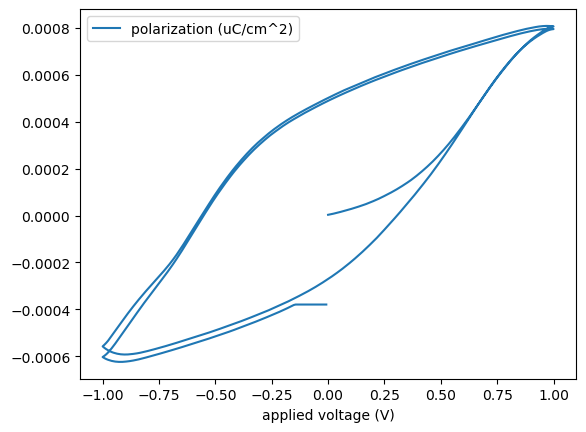

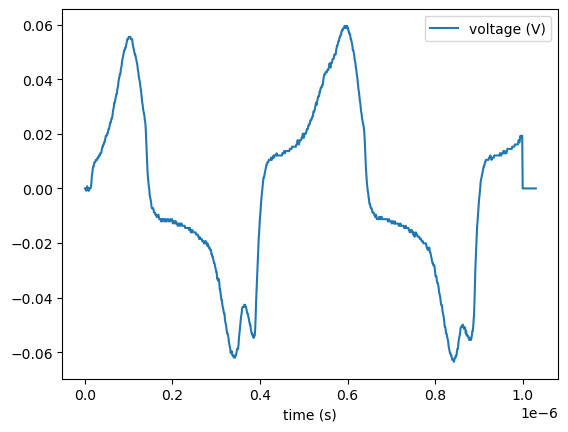

In [5]:
process_raw_hyst(r'C:\Users\adqua\OneDrive\Documents\Lab\virtual_hyst_data.csv', show_plots=True)

In [5]:
amp = 2.5
delay = 1.0e-7
experiment = PUNDPulse(awg, scope, v_div=0.2, reset_amp=amp, p_u_amp=amp, reset_delay=delay, reset_width=delay, p_u_delay=delay, p_u_width=delay)
experiment.run_experiment(save_path=r"C:\Users\adqua\OneDrive\Documents\Lab\virtual_pund_data.csv")

Estimated Peak-to-Peak Ratio of targetted value is 100.0%
QUERY:  :DATA:CAT?  NOT IN virtual_scpi_queries.json
AWG configured for a PUND pulse.
Capturing waveform of type PUND for 6e-07 seconds...
Waveform captured.
Waveform data saved to C:\Users\adqua\OneDrive\Documents\Lab\virtual_pund_data.csv


In [12]:
import numpy as np

In [18]:
amp = 2.5
delay = 1.0e-7

voltages = np.linspace(0,amp,20)

experiment = PUNDPulse(awg, scope, v_div=0.3, reset_amp=amp, p_u_amp=amp, reset_delay=delay, reset_width=delay, p_u_delay=delay, p_u_width=delay)
for v in voltages:
    experiment.p_u_amp = v
    experiment.run_experiment(save_path=r"C:\Users\adqua\OneDrive\Documents\Lab\data\10nmHZO_10umpad_"+str(v).replace('.','p')[:4]+r"V_pund_data.csv")

c:\Users\adqua\Documents\GitHub\PIEC\src\piec\measurement_waveforms\discrete_waveform.py:220: RuntimeWarning: divide by zero encountered in scalar divide
  frac_p_u_amp = amplitude/self.p_u_amp
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\function_base.py:139: RuntimeWarning: invalid value encountered in scalar subtract
  delta = stop - start
c:\Users\adqua\Documents\GitHub\PIEC\src\piec\drivers\scpi_instrument.py:765: RuntimeWarning: invalid value encountered in cast
  return scaled_data.astype(np.int32)


CAN NOT PRESERVE WF OVER HALF OF RESOLUTION IS GONE
Estimated Peak-to-Peak Ratio of targetted value is nan%
AWG configured for a PUND pulse.
Capturing waveform of type PUND for 6e-07 seconds...
Waveform captured.
Waveform data saved to C:\Users\adqua\OneDrive\Documents\Lab\data\10nmHZO_10umpad_0p0V_pund_data.csv
CAN NOT PRESERVE WF OVER HALF OF RESOLUTION IS GONE
Estimated Peak-to-Peak Ratio of targetted value is 52.6%
AWG configured for a PUND pulse.
Capturing waveform of type PUND for 6e-07 seconds...
Waveform captured.
Waveform data saved to C:\Users\adqua\OneDrive\Documents\Lab\data\10nmHZO_10umpad_0p13V_pund_data.csv
Estimated Peak-to-Peak Ratio of targetted value is 55.3%
AWG configured for a PUND pulse.
Capturing waveform of type PUND for 6e-07 seconds...
Waveform captured.
Waveform data saved to C:\Users\adqua\OneDrive\Documents\Lab\data\10nmHZO_10umpad_0p26V_pund_data.csv
Estimated Peak-to-Peak Ratio of targetted value is 57.8%
AWG configured for a PUND pulse.
Capturing wavefo